<a href="https://colab.research.google.com/github/AzizJaser/Heart-Strokes-Predicition/blob/main/Heart_Strokes_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # pandas: A powerful library for data manipulation and analysis.
import numpy as np # numpy: A library for numerical computing in Python.
import matplotlib.pyplot as plt # matplotlib: A plotting library to create static, animated, and interactive visualizations in Python.
import seaborn as sns # seaborn: A data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.
import missingno as msno # missingno (msno): A library for visualizing missing data in datasets.
from sklearn.preprocessing import LabelEncoder # LabelEncoder: A utility class to help normalize labels such that they contain only values between 0 and n_classes-1.
from tqdm import tqdm # tqdm: A library to show progress bars for loops and computations.
import imblearn # imblearn: A library providing methods to cope with imbalanced datasets.
from collections import Counter # Counter: A dictionary subclass to count hashable objects.
from imblearn.over_sampling import SMOTE # SMOTE: A method for oversampling in imbalanced datasets.
from imblearn.under_sampling import RandomUnderSampler # RandomUnderSampler: A method for undersampling in imbalanced datasets.
from imblearn.pipeline import Pipeline # Pipeline: A utility to help with sequential application of a list of transforms and a final estimator.
from sklearn.model_selection import train_test_split # train_test_split: A utility to split datasets into random train and test subsets.
from sklearn.metrics import confusion_matrix # confusion_matrix: A method to compute the confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import classification_report # classification_report: A method to build a text report showing the main classification metrics.
from sklearn.metrics import accuracy_score # accuracy_score: A method to compute the accuracy classification score.
from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier: A classifier implementing the k-nearest neighbors vote.
print("Setup complete")

Setup complete


In [ ]:
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

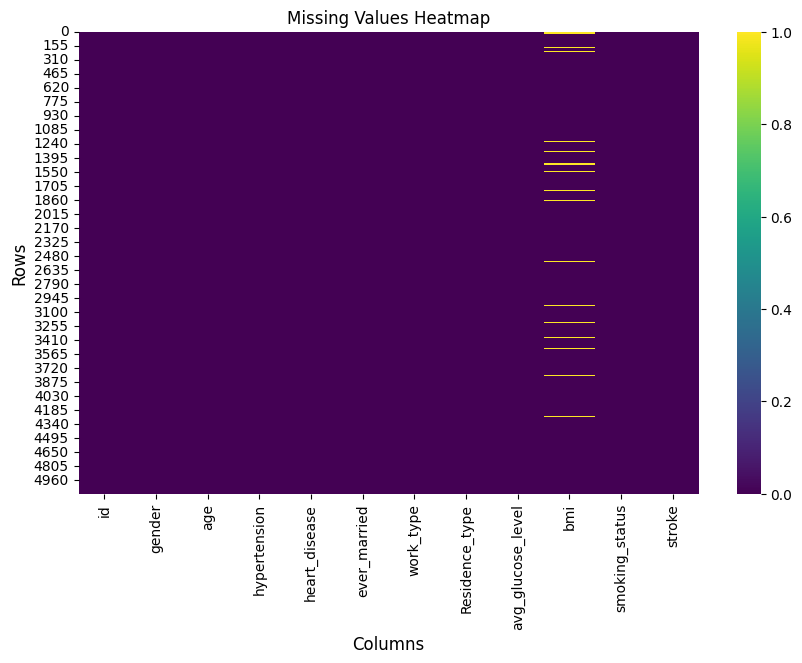

In [ ]:
def display_missing_values_heatmap(dataframe, figsize =(10,6), cmap='viridis',fontsize=12):
    plt.figure(figsize=figsize)
    sns.heatmap(dataframe.isnull(),cmap=cmap)
    plt.title("Missing Values Heatmap",fontsize=fontsize)
    plt.xlabel("Columns",fontsize=fontsize)
    plt.ylabel("Rows",fontsize=fontsize)
    plt.show()

display_missing_values_heatmap(data)

In [ ]:
data.describe(include='O').T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [ ]:
data.drop(columns=['id'],inplace=True) # drop 'id' beacuse it is just a unique identifier

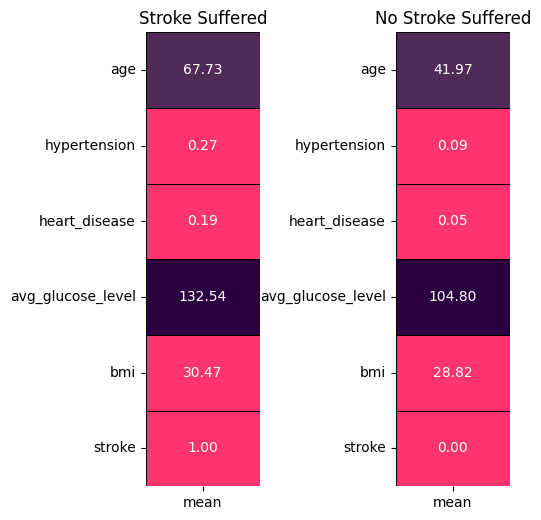

In [ ]:
stroke = data[data['stroke'] == 1].describe().T
no_stroke = data[data['stroke'] == 0].describe().T

colors = ['#fe346e','#512b58','#2c003e']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke Suffered')

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke Suffered')

fig.tight_layout(pad = 0)

In [ ]:
# Fill Missing Values with mean values
data['bmi'].replace(np.nan,data['bmi'].mean(), inplace=True)

data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
from pandas.core.arrays.categorical import Categorical
discrete_feature = []
categorical_features = []

for i in list(data.columns):
    if len(data[i].unique()) > 6 :
        discrete_feature.append(i)
    else:
        categorical_features.append(i)

print("Discrete Feature:")
print(discrete_feature)
print("Categorical Feature:")
print(categorical_features)

Discrete Feature:
['age', 'avg_glucose_level', 'bmi']
Categorical Feature:
['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


In [ ]:
# Labeling the categorical Feature
data1 = data.copy(deep=True)
le = LabelEncoder()
text_cols = list(data1.select_dtypes(include=['object']).columns)

l3 = []; l4 = [];

print('Label Encoder Trasformation')
for i in tqdm(text_cols):
    data1[i] = le.fit_transform(data1[i])
    l3.append(list(data1[i].unique()));l4.append(list(le.inverse_transform(data1[i].unique())))
    print(i,' : ',data1[i].unique(), ' = ',le.inverse_transform(data1[i].unique()))


Label Encoder Trasformation


100%|██████████| 5/5 [00:00<00:00, 193.69it/s]

gender  :  [1 0 2]  =  ['Male' 'Female' 'Other']
ever_married  :  [1 0]  =  ['Yes' 'No']
work_type  :  [2 3 0 4 1]  =  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  :  [1 0]  =  ['Urban' 'Rural']
smoking_status  :  [1 2 3 0]  =  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
tf1 = {}
for i in range(len(text_cols)):
    tf1[text_cols[i]] = {}
    for j,k in zip(l3[i],l4[i]):
        tf1[text_cols[i]][j] = k

tf1['hypertension'] = {0 : 'No Hypertension', 1 : 'Hypertension'}
tf1['heart_disease'] = {0 : 'No Heart Disease', 1 : 'Heart Disease'}
tf1

{'gender': {1: 'Male', 0: 'Female', 2: 'Other'},
 'ever_married': {1: 'Yes', 0: 'No'},
 'work_type': {2: 'Private',
  3: 'Self-employed',
  0: 'Govt_job',
  4: 'children',
  1: 'Never_worked'},
 'Residence_type': {1: 'Urban', 0: 'Rural'},
 'smoking_status': {1: 'formerly smoked',
  2: 'never smoked',
  3: 'smokes',
  0: 'Unknown'},
 'hypertension': {0: 'No Hypertension', 1: 'Hypertension'},
 'heart_disease': {0: 'No Heart Disease', 1: 'Heart Disease'}}

Target Variable Visualization(stroke)

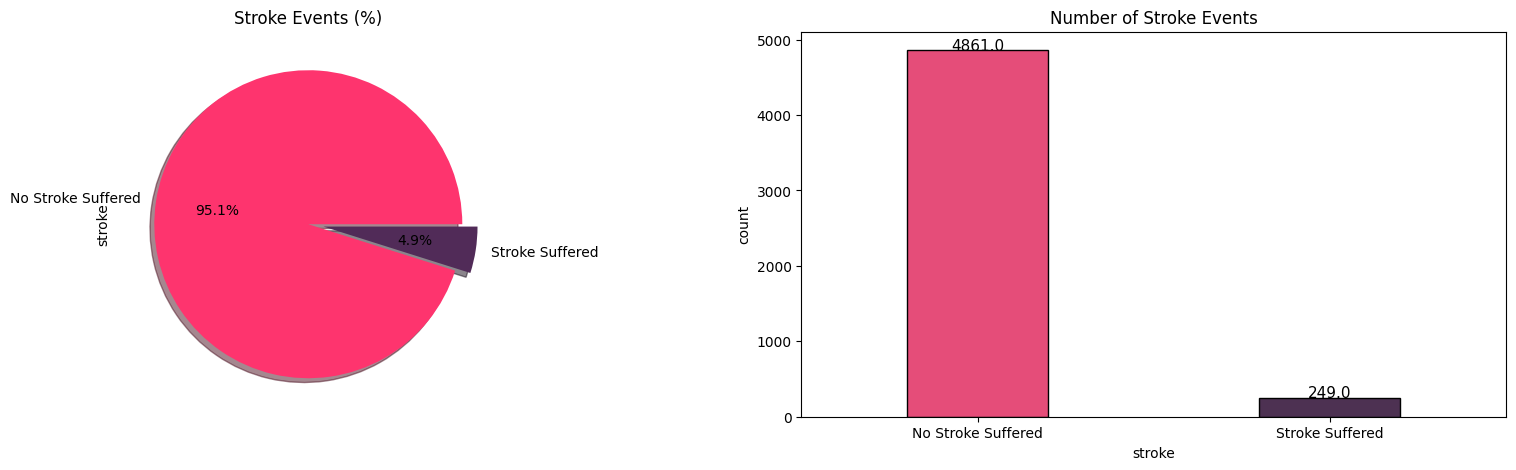

In [ ]:
l = data['stroke'].value_counts()

fig = plt.subplots(nrows = 1,ncols =2, figsize=(20,5))
plt.subplot(1,2,1)

l.plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, labels=['No Stroke Suffered','Stroke Suffered'], colors=colors)

plt.title("Stroke Events (%)")

plt.subplot(1,2,2)

ax = sns.countplot(x='stroke',data = data1, palette= colors, edgecolor = 'black',width=0.4)

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Stroke Suffered','Stroke Suffered'])
plt.title('Number of Stroke Events')
plt.show()

## Discrete Feature:

Distribution of Discrete Feature:

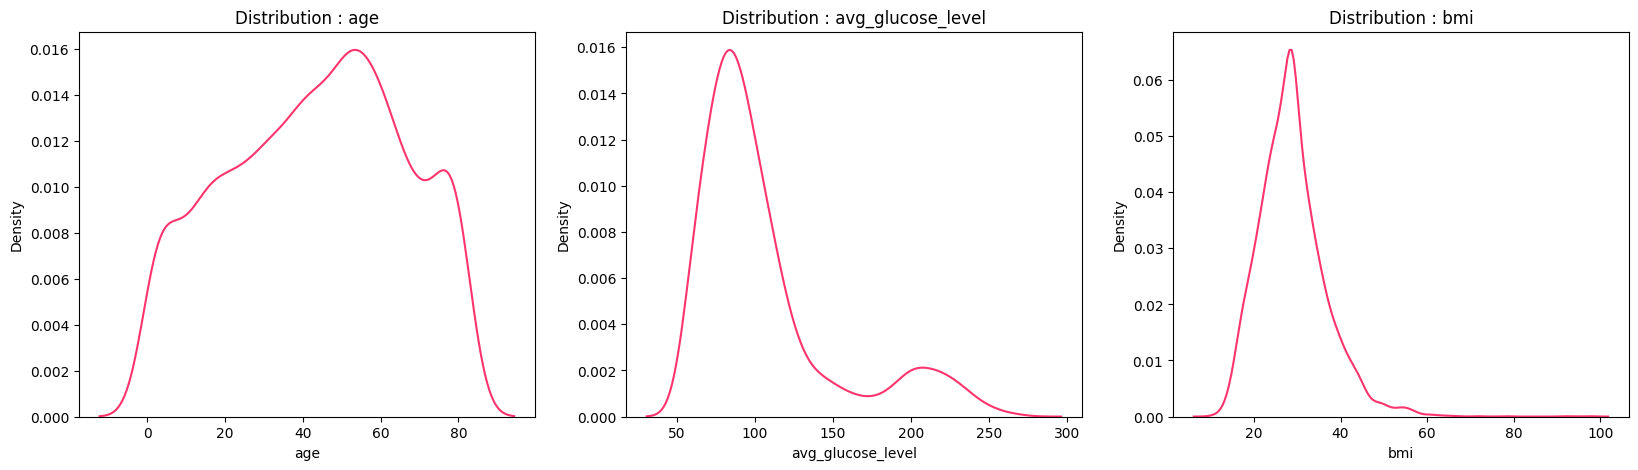

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(20,5))

for i in range(len(discrete_feature)):
    plt.subplot(1,3,i+1)
    sns.kdeplot(data1[discrete_feature[i]],color = colors[0])
    title = "Distribution : "+ discrete_feature[i]
    plt.title(title)
plt.show()

## Categorical Features:

In [ ]:
categorical_features.remove('stroke')
# remove the target from the categorical features

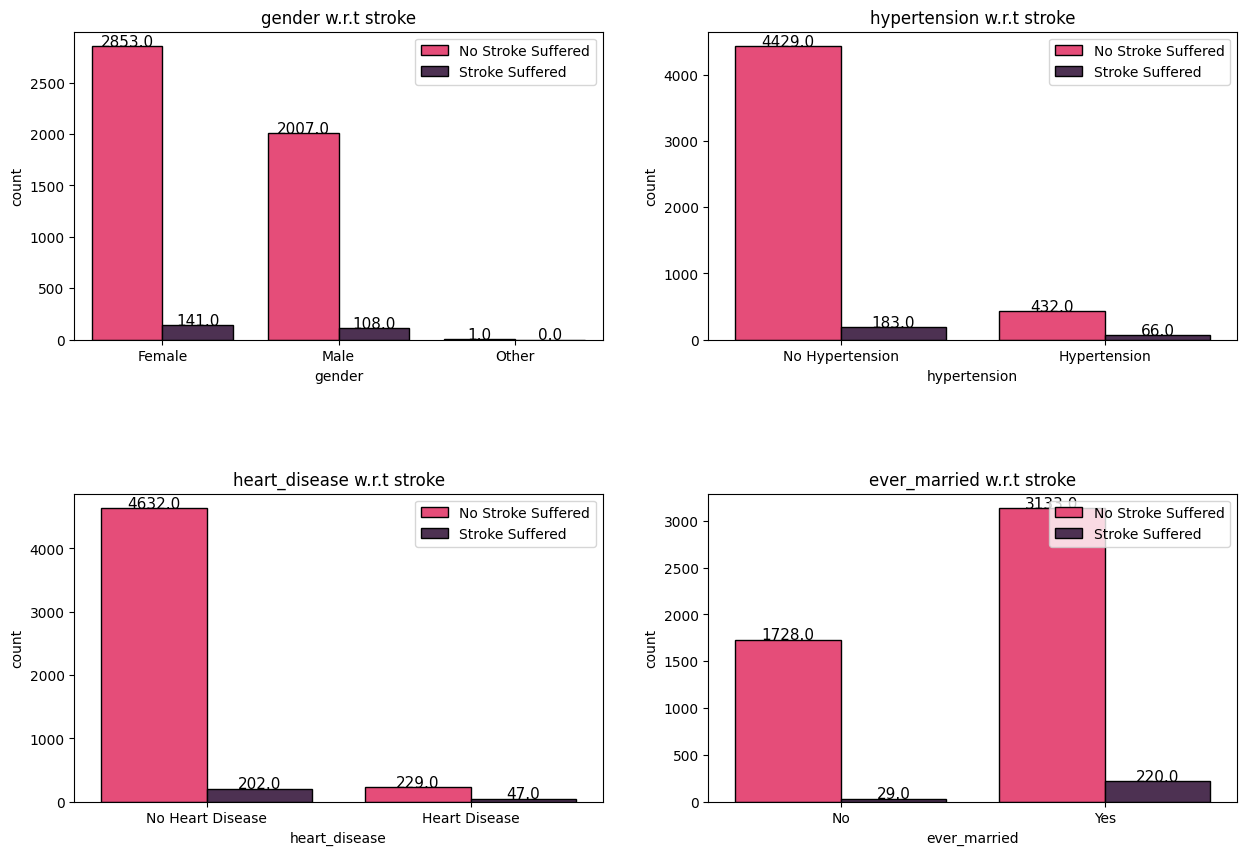

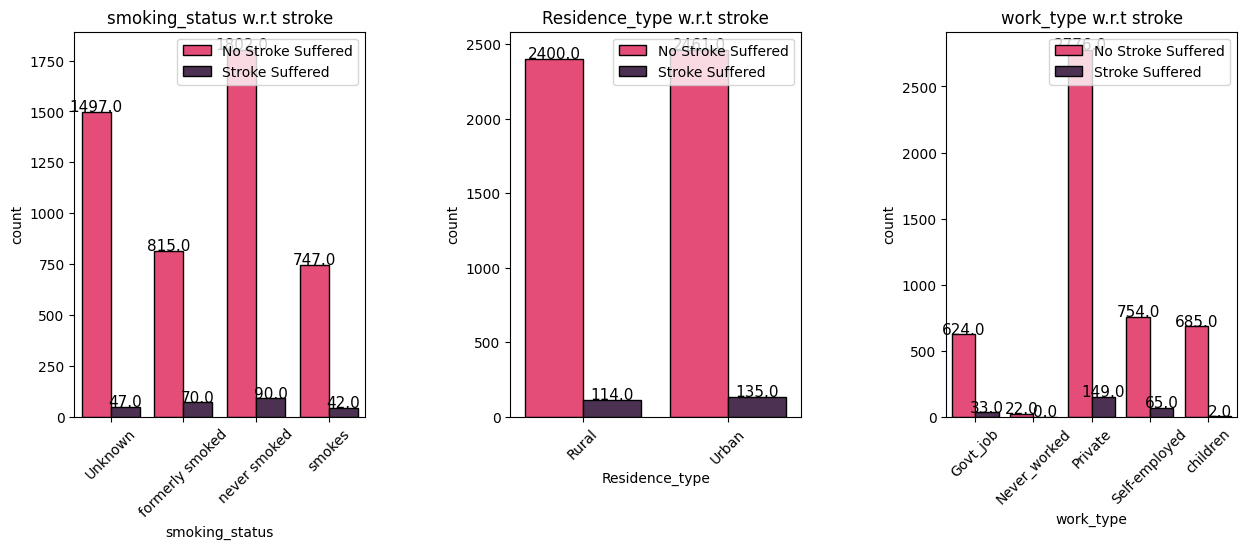

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=categorical_features[i],data = data1,hue = "stroke",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(data1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    ax = sns.countplot(x=categorical_features[i],data = data1,hue = "stroke",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(data1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title)
    plt.xticks(rotation=45)

# **Data Balancing using SMOTE**

In [ ]:
under = RandomUnderSampler(sampling_strategy=0.1) # 249 / 4861 = 0.1 , smapling = 2490
over = SMOTE(sampling_strategy=1) # 2490 / 2490 = 1

features1 = data1.drop(columns=['stroke'])
target1 = data1['stroke']

steps = [('under',under),('over',over)]

pipeline = Pipeline(steps = steps)

features1,target1 = pipeline.fit_resample(features1,target1)

result = pd.concat([features1, target1], axis=1)
Counter(target1)

# 0 not stroke , 1 stroke

Counter({0: 2490, 1: 2490})

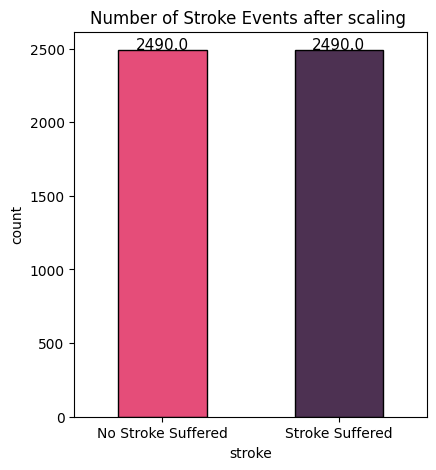

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,2)

ax = sns.countplot(x='stroke',data = result, palette= colors, edgecolor = 'black',width=0.5)

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Stroke Suffered','Stroke Suffered'])
plt.title('Number of Stroke Events after scaling ')
plt.show()

## Spilt data into train and test

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(features1,target1,test_size=0.20,random_state=2)

x_train_test = x_train.copy(deep=True)
x_train_test['stroke'] = y_train

## **Features Selection using Chi sqaured:**
The Chi-squared test is a tool used to determine the importance of categorical features in relation to a target variable. Specifically, it measures the dependence between each feature and the target. If a feature is independent of the target, it may not be useful for prediction, and the Chi-squared test can help identify such features.

<ipython-input-22-909f94367c9e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,1,1)


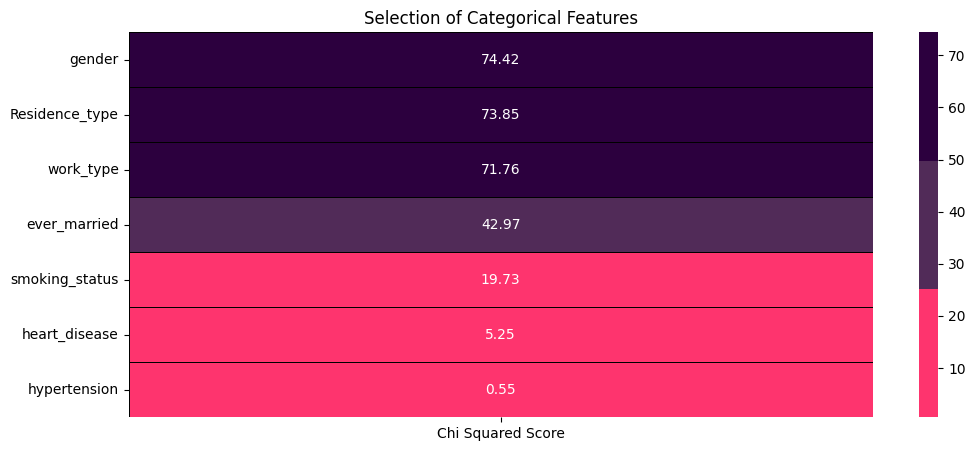

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

plt.subplot(1,1,1)
features = x_train.loc[:,categorical_features]
target = y_train

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

In [ ]:
# since we use chi squared we will drop the features that has 20 and less scores (smoking_status,heart_disease and hypertension)
x_train = x_train.drop(columns = ['smoking_status', 'heart_disease', 'hypertension'])
x_test = x_test.drop(columns = ['smoking_status', 'heart_disease', 'hypertension'])

**ANOVA test is simlear to chi squared except that it's used for either categorical and numerical.**

<ipython-input-24-393c566346b5>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,1,1)


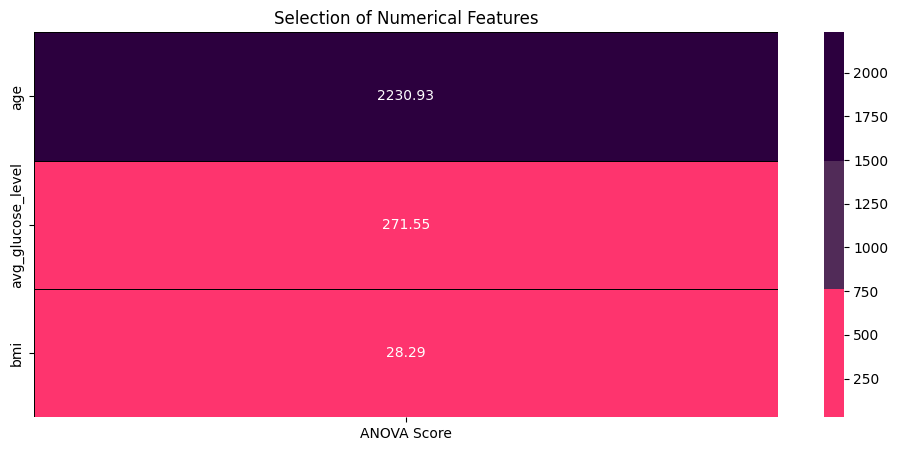

In [ ]:
from sklearn.feature_selection import f_classif

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

plt.subplot(1,1,1)
features = x_train.loc[:,discrete_feature]
target = y_train

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [ ]:
# since we use ANOVA we will drop the features that has less scores whitch is bmi
x_train = x_train.drop(columns=['bmi'])
x_test = x_test.drop(columns=['bmi'])

## Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization



# Normalization
x_train['age'] = mms.fit_transform(x_train[['age']])
x_test['age'] = mms.fit_transform(x_test[['age']])
x_train['avg_glucose_level'] = mms.fit_transform(x_train[['avg_glucose_level']])
x_test['avg_glucose_level'] = mms.fit_transform(x_test[['avg_glucose_level']])

# Standardization
x_train['gender'] = ss.fit_transform(x_train[['gender']])
x_test['gender'] = ss.transform(x_test[['gender']])
x_train['ever_married'] = ss.fit_transform(x_train[['ever_married']])
x_test['ever_married'] = ss.transform(x_test[['ever_married']])
x_train['work_type'] = ss.fit_transform(x_train[['work_type']])
x_test['work_type'] = ss.transform(x_test[['work_type']])
x_train['Residence_type'] = ss.fit_transform(x_train[['Residence_type']])
x_test['Residence_type'] = ss.transform(x_test[['Residence_type']])

In [ ]:
x_train1, x_test1, y_train1, y_test1 = x_train.values, x_test.values, y_train.values, y_test.values

# Build and Test The Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
model = KNeighborsClassifier() # default value 5

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

print("F1_score: ", f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       494
           1       0.82      0.92      0.87       502

    accuracy                           0.86       996
   macro avg       0.86      0.86      0.86       996
weighted avg       0.86      0.86      0.86       996

Accuracy Score: 0.857429718875502
F1_score:  0.8670411985018726
